## Import all necesary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Share the dataset source link, a brief description of its content and your motivation for choosing it.
### Link: <br>
"https://opendata-ajuntament.barcelona.cat/data/es/dataset/est-cadastre-habitatges-superficie-mitjana/resource/d309f5d0-06e1-47e2-accd-e0e2f08e275b"

### Description and motivation: 
It's a csv file from the open data of the the Ajuntament de Barcelona official website. It contains the details of the average surface area of properties in the city of Barcelona whose main use and purpose is housing. I've chosen this topic because i'm a international student that is looking for housing right now, and my main scopes are location and square feet (also price, but since this is an official dataset from Barcelona's Townhall, they can't really give market speculation numbers). <p>
It's a fun topic that comes in handy with my current situation




### 2. Load the dataset using Pandas.


In [5]:
# Load the dataset
barcelona_houses_2025_df = pd.read_csv('2025_properties.csv')

# Display the first 5 rows to ensure the format is correct
barcelona_houses_2025_df.head()

,Year,Code_district,Name_district,Code_barrio,Name_barrio,Seccion_censal,Sup_media_m2
0,2025,1,Ciutat Vella,1,el Raval,1,76.7
1,2025,1,Ciutat Vella,1,el Raval,2,68.1
2,2025,1,Ciutat Vella,1,el Raval,3,59.1
3,2025,1,Ciutat Vella,1,el Raval,4,65.4
4,2025,1,Ciutat Vella,1,el Raval,5,76.6


In [103]:
#Lets also see if it meets the requirements: between 500 and 2000 rows and between 5 and 10 columns
barcelona_houses_2025_df.shape

(1068, 7)

### 3. Make some basic data profiling (statistics about the data, distributions, missing values, etc.) using Pandas methods.

In [104]:
#Lets check the basic numeric stats of the datset with describe()
barcelona_houses_2025_df.describe().round(1)

,Year,Code_district,Code_barrio,Seccion_censal,Sup_media_m2
count,1068.0,1068.0,1068.0,1068.0,1068.0
mean,2025.0,5.7,33.2,60.6,77.9
std,0.0,2.9,21.9,41.6,20.1
min,2025.0,1.0,1.0,1.0,36.1
25%,2025.0,3.0,13.0,27.8,66.3
50%,2025.0,6.0,31.0,54.0,73.5
75%,2025.0,8.0,52.0,87.0,82.8
max,2025.0,10.0,73.0,237.0,233.8


In [98]:
#Checking if any of the columns have missing values
barcelona_houses_2025_df.isnull().sum()

Year              0
Code_district     0
Name_district     0
Code_barrio       0
Name_barrio       0
Seccion_censal    0
Sup_media_m2      0
Size_category     0
Is_above_avg      0
dtype: int64

In [105]:
#Check how many Districts and Barrios (neighborhoods) we have in the csv
print(f"Districts found: {barcelona_houses_2025_df['Name_district'].nunique()}")
print(f"Neighborhoods found: {barcelona_houses_2025_df['Name_barrio'].nunique()}")

#Lets also check the amount of Neighborhoods in each District and sort them from the largest to the smallest
neighborhoods_per_district = barcelona_houses_2025_df.groupby(['Code_district', 'Name_district'])['Name_barrio'].nunique().reset_index()
neighborhoods_per_district = neighborhoods_per_district.sort_values(by='Name_barrio', ascending=False)
neighborhoods_per_district.rename(columns={'Name_barrio': "Num_of_barrios"})

Districts found: 10
Neighborhoods found: 73


,Code_district,Name_district,Num_of_barrios
7,8,Nou Barris,13
6,7,Horta-Guinardó,11
9,10,Sant Martí,10
2,3,Sants-Montjuïc,8
8,9,Sant Andreu,7
1,2,L'Eixample,6
4,5,Sarrià-Sant Gervasi,6
5,6,Gràcia,5
0,1,Ciutat Vella,4
3,4,Les Corts,3


### 4. Create 2 new useful or interesting columns based on other existing columns in the dataset (e.g., a ratio, a category based on numerical values, etc.).

In [108]:
#New column 1: Lets cassify the properties by "Small", "Medium" and "Large" based on the surface area.
def property_size (m2):
    if m2 < 60: 
        return 'Small'
    elif 60 <= m2 <= 90: 
        return 'Medium'
    else: 
        return 'Large'

barcelona_houses_2025_df['Size_category'] = barcelona_houses_2025_df['Sup_media_m2'].apply(property_size)

#New column 2: Lets get the averge size of all the properties in Barcelona and store in the new column a boolean "True" if the 'Sup_media_m2' is larger and "False" if its smaller than the city average
city_property_avg = barcelona_houses_2025_df['Sup_media_m2'].mean()

barcelona_houses_2025_df['Is_above_avg'] = barcelona_houses_2025_df['Sup_media_m2'] > city_property_avg

barcelona_houses_2025_df[['Name_barrio', 'Sup_media_m2', 'Size_category', 'Is_above_avg']].sort_values('Sup_media_m2', ascending=False)

,Name_barrio,Sup_media_m2,Size_category,Is_above_avg
454,Sant Gervasi- Galvany,233.8,Large,True
455,Sant Gervasi- Galvany,207.9,Large,True
453,Sant Gervasi- Galvany,181.6,Large,True
399,Pedralbes,171.0,Large,True
460,Sant Gervasi- Galvany,169.8,Large,True
...,...,...,...,...
31,la Barceloneta,42.0,Small,False
33,la Barceloneta,38.1,Small,False
32,la Barceloneta,37.3,Small,False
36,la Barceloneta,36.2,Small,False


## 5. Make 3 interesting observations about the data based on your analysis, using Pandas queries and Matplotlib visualizations. Add storytelling in Markdown cells to explain your findings and why they are interesting/relevant.

### Observation 1  
Do different districs have diferrent average housing sizes?


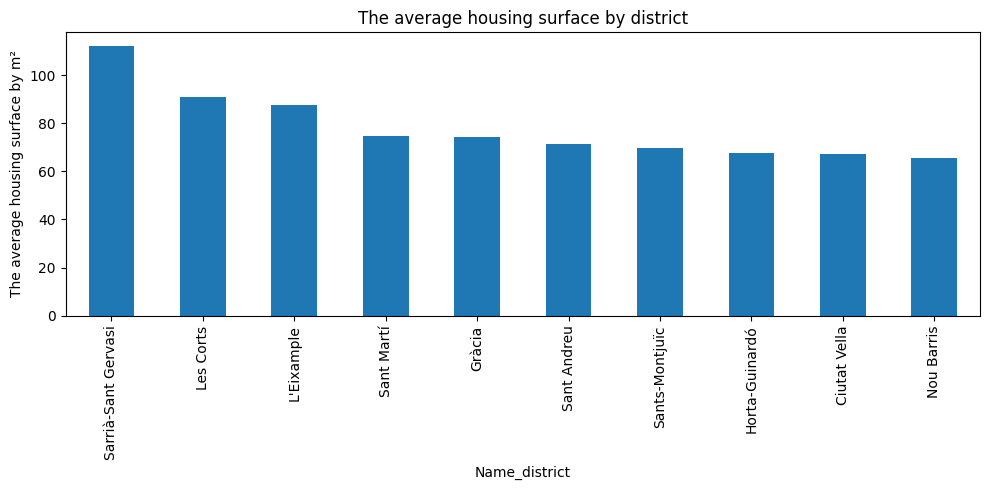

In [111]:
district_avg = barcelona_houses_2025_df.groupby('Name_district')['Sup_media_m2'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
district_avg.plot(kind="bar")
plt.ylabel("The average housing surface by m²")
plt.title("The average housing surface by district")
plt.tight_layout()
plt.show()


Average size of homes varies noticeably between districs. From that, we can say that city housing patterns and urban density differ greatly from one another, having Sarrià-Sant Gervasi as the largest by average m2 of surface, and Nou Barris as the district with the smallest average m2 of surface.

### Observation 2  
Which Barrios have the biggest average home sizes?


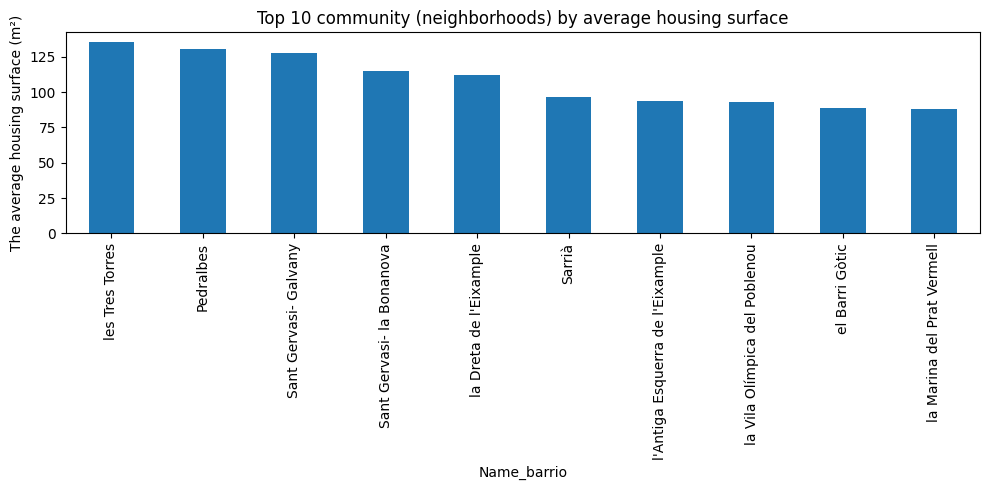

In [112]:
top_neighborhoods = (
    barcelona_houses_2025_df.groupby('Name_barrio')['Sup_media_m2']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
top_neighborhoods.plot(kind="bar")
plt.ylabel("The average housing surface (m²)")
plt.title("Top 10 community (neighborhoods) by average housing surface")
plt.tight_layout()
plt.show()


From the graph, we can say that the largest avergae home size is in les Tres Torres, wher the smallest averge home sizes are in el Barri Gotic and la Marina del Prat Vermell. We can add a comment that housing characteristics vary throughout the city.


### Observation 3  
Has the typical housing surface evolved over time?

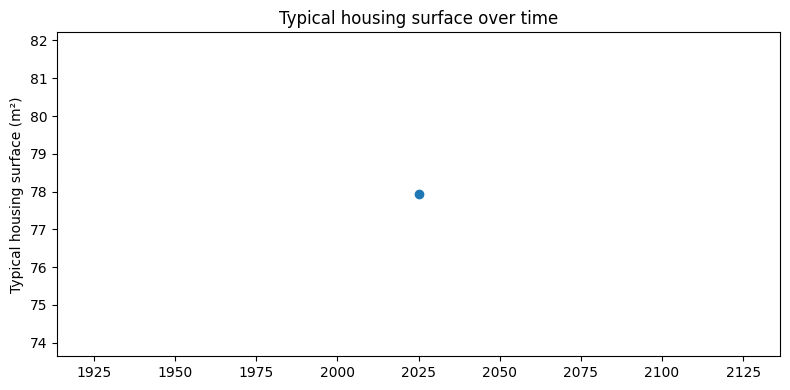

In [9]:
year_avg = barcelona_houses_2025_df.groupby('Year')['Sup_media_m2'].mean().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(year_avg.index, year_avg.values, marker="o")
plt.ylabel("Typical housing surface (m²)")
plt.title("Typical housing surface over time")
plt.tight_layout()
plt.show()



Yes, this is kinda pointless since the dataset only has properties from 2025, but still, if we had more rows with different historic information, maybe we could've seen a trend of the housing downsizing overtime. We understand that this dataset was lacking numerical columns, but it fulfils the educational purpose for learning python + pandas + matplotlib

## 6. Using Pandas again, export the modified dataset to a new CSV file.

In [10]:
barcelona_houses_2025_df.to_csv('new_barcelona_houses_2025.csv', index=False)